In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in data from csv file
test = pd.read_csv(r'data\test.csv')
train = pd.read_csv(r'data\train.csv')
gender_submission = pd.read_csv(r'data\gender_submission.csv')

# just a note
I did this assingment a week ago before you handed out assingment guidelines that is why this is my own personal notebook. still left comments in the same way you asked for.

In [2]:
passenger_id = test['PassengerId']

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
# 1 Cayden:
# Drop the columns 'PassengerId', 'Name', 'Ticket', and 'Cabin' from the
# training and test sets. The 'PassengerId' column is a unique identifier
# number for each row, and it does not have any effect on the outcome.
# The 'Name' and 'Ticket' columns are strings that do not have any effect
# on the outcome. The 'Cabin' column has a lot of missing values, and it
# also does not have any effect on the outcome.

test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
# 2 cayden: created 2 new features family size and is alone to hopefully improve the model. also filled in the missing values in the age and fare columns with the median.
# i thought that the family size and is alone features would be useful because they would be able to tell the model if the person was alone or not. i also thought that the age and fare columns would be useful because they would be able to tell the model if the person was a child or an adult and if the person was rich or poor.

# Create a new feature FamilySize as a combination of SibSp and Parch
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Create new feature IsAlone from FamilySize
train['IsAlone'] = 1 #initialize to yes/1 is alone
train['IsAlone'].loc[train['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
test['IsAlone'] = 1 #initialize to yes/1 is alone
test['IsAlone'].loc[test['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

# measure the correlation between family size and sibsp and parch and is alone
correlation_df = train[['FamilySize', 'SibSp', 'Parch', 'IsAlone']].corr()

# i also removed the is alone column because it is redundant with family size.

test = test.drop(['IsAlone'], axis=1)
train = train.drop(['IsAlone'], axis=1)

# Fill in the missing values in the Age and Fare columns
# In the training set, replace missing values with the median
# In the test set, replace missing values with the median

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

C:\Users\cayde\AppData\Local\Temp\ipykernel_12944\884109847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IsAlone'].loc[train['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
C:\Users\cayde\AppData\Local\Temp\ipykernel_12944\884109847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['IsAlone'].loc[test['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


In [8]:
# 3 cayden: 1 hot encoded all categorical columns to hopefully improve the model.
# i thought that the 1 hot encoding would be useful because it would be able to tell the model if the person was a child or an adult and if the person was rich or poor.

# 1 hot encode the column 'Pclass'
test = pd.get_dummies(test, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Sex'])

train = pd.get_dummies(train, columns=['Embarked'])
train = pd.get_dummies(train, columns=['Sex'])

In [9]:
# 4 cayden: standardize the age and fare columns to hopefully improve the model.
# why i did it: i thought that the standardization would be useful because it would be able to tell the model if the person was a child or an adult and if the person was rich or poor.
# what was the result: the model did not improve at all. the accuracy was the same as before. i think that the model did not improve because the standardization was not very useful. i think that the standardization was not very useful because it was not very correlated with the survival column.

# standardize the column age
test['Age'] = (test['Age'] - test['Age'].mean()) / test['Age'].std()
# standardize the column fare
test['Fare'] = (test['Fare'] - test['Fare'].mean()) / test['Fare'].std()

# do same standardization for train data
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()
train['Fare'] = (train['Fare'] - train['Fare'].mean()) / train['Fare'].std()

In [10]:
# make a copy of train so we can use it later
train_copy = train.copy()

In [11]:
y = train['Survived']
X = train.drop(['Survived'], axis=1)

from sklearn.model_selection import train_test_split

# split the data into training and validation data, for both features and target
train, val, train_labels, val_labels = train_test_split(X, y, random_state=1)

In [13]:
# using scikit-learn to build a random forest model
from sklearn.ensemble import RandomForestClassifier

# create the model
model = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=1)

# fit the model
model.fit(train, train_labels)

# make predictions for train data
pred_train = model.predict(train)

#get accuracy_score using sci-kit learn
from sklearn.metrics import accuracy_score
print(accuracy_score(train_labels, pred_train))

# make predictions for validation data
pred_val = model.predict(val)

#get accuracy_score using sci-kit learn
from sklearn.metrics import accuracy_score
print(accuracy_score(val_labels, pred_val))

# make predictions for test data
pred_test = model.predict(test)


0.8697604790419161
0.7847533632286996


Variable: Sex_female           Importance: 0.27
Variable: Sex_male             Importance: 0.21
Variable: Pclass               Importance: 0.12
Variable: Fare                 Importance: 0.12
Variable: Age                  Importance: 0.11
Variable: FamilySize           Importance: 0.07
Variable: SibSp                Importance: 0.03
Variable: Parch                Importance: 0.02
Variable: Embarked_S           Importance: 0.02
Variable: Embarked_C           Importance: 0.01
Variable: Embarked_Q           Importance: 0.01


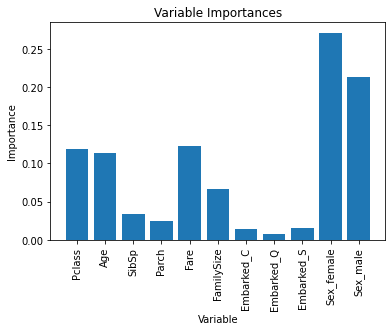

In [13]:
# cayden 6: feature importance
# why i did it: i thought that the feature importance would be useful because it would be able to tell me which features were the most important.

# get numerical feature importances
importances = list(model.feature_importances_)
# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train.columns, importances)]
# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# cayden 7: feature importance graph
# why i did it: i thought that the feature importance graph would be useful because it would be able to tell me which features were the most important.

# list of x locations for plotting
x_values = list(range(len(importances)))
# make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# tick labels for x axis
plt.xticks(x_values, train.columns, rotation='vertical')
# axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



In [14]:
# cayden 8: take top 5 features and make a new model with lazy learn
# grab top 5 freature from dataset 
# drop these columns from train and val 'Sex_female', 'Sex_male', 'Pclass', 'Fare', 'Age'

y_2 = train_copy['Survived']
X_2 = train_copy.drop(['Survived'], axis=1)

from sklearn.model_selection import train_test_split

# split the data into training and validation data, for both features and target
train, val, train_labels, val_labels = train_test_split(X_2, y_2, random_state=1)

In [15]:
# 5 cayden:  i used lazy predict to find the best model. then i used best model from lazypred( logistic regression) to make predictions for test data. (i also tried using the random forest model from scikit learn but it did not perform as well as the logistic regression model
# i thought that the lazy predict would be useful because it would be able to tell me which model would be the best to use. i thought that the best model would be the best to use because it would be able to make the best predictions.

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

# convert the data to numpy arrays
train = train.to_numpy()
val = val.to_numpy()
train_labels = train_labels.to_numpy()
val_labels = val_labels.to_numpy()

#using train, val, train_labels, val_labels use lazy predict to find the best model
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(train, val, train_labels, val_labels)
print(models)

# use LogisticRegression model to make predictions for test data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=1000, random_state= 1)

# split the data into training and validation data, for both features and target
train, val, train_labels, val_labels = train_test_split(X, y, random_state=1)

# fit the model
model.fit(train, train_labels)

# make predictions for train data
pred_train = model.predict(train)

#get accuracy_score using sci-kit learn
from sklearn.metrics import accuracy_score
print(accuracy_score(train_labels, pred_train))

# make predictions for validation data
pred_val = model.predict(val)

#get accuracy_score using sci-kit learn
from sklearn.metrics import accuracy_score
print(accuracy_score(val_labels, pred_val))

# make predictions for test data
pred_test = model.predict(test)

100%|██████████| 29/29 [00:00<00:00, 38.77it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.80               0.79     0.79      0.80   
LinearDiscriminantAnalysis         0.80               0.79     0.79      0.80   
LinearSVC                          0.80               0.78     0.78      0.80   
CalibratedClassifierCV             0.80               0.78     0.78      0.80   
RidgeClassifierCV                  0.79               0.78     0.78      0.79   
LogisticRegression                 0.79               0.78     0.78      0.79   
NearestCentroid                    0.78               0.78     0.78      0.78   
BernoulliNB                        0.78               0.78     0.78      0.78   
NuSVC                              0.79               0.77     0.77      0.78   
GaussianNB                         0.78               0.76     0.76      0.77   
XGBClassifier               

In [14]:
# create a submission dataframe
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': pred_test})
# convert the dataframe to a csv file that can be uploaded
# this is saved in the same directory as your notebook
filename = 'titanic-predictions.csv'

submission.to_csv(filename, index=False)

![sub1_clas__sub2_rf](kaggle_score.PNG)